Start - Sumaiya

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
)

Dataset

In [3]:
df = pd.read_csv('SumaiyaAbdullah.csv')


print("Shape of dataset:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
print("\nFirst 5 rows:\n")
display(df.head())

Shape of dataset: (7043, 12)

Column Names:
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'InternetService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']

First 5 rows:



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,No,56.95,1889.5,No
2,3668-QPYBK,Male,1,No,Yes,2,Yes,No,Yes,NaN,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,No,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,Fiber optic,Yes,70.70,151.65,Yes


EDA

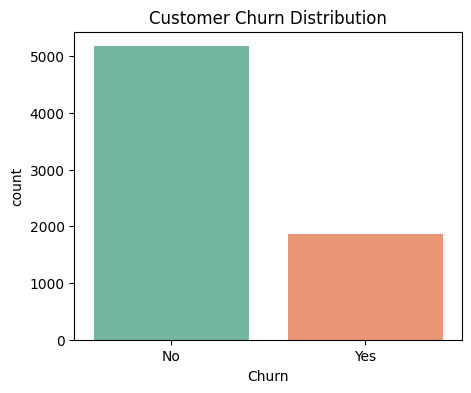

In [4]:
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Customer Churn Distribution')
plt.show()

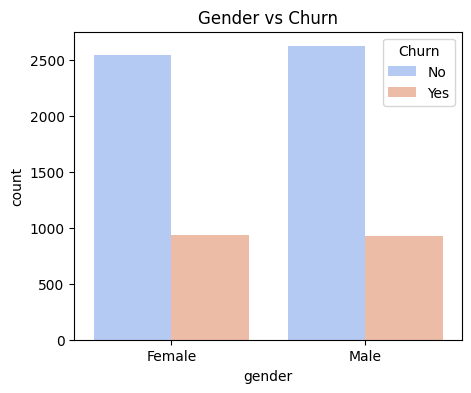

In [5]:
plt.figure(figsize=(5,4))
sns.countplot(x='gender', hue='Churn', data=df, palette='coolwarm')
plt.title('Gender vs Churn')
plt.show()

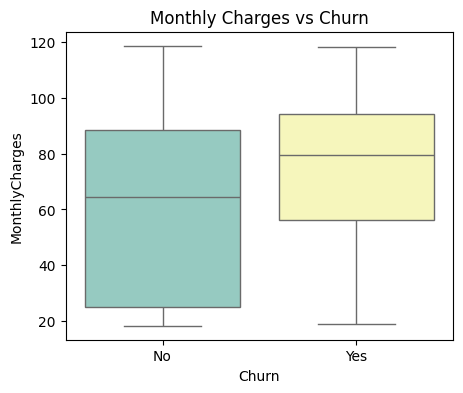

In [6]:
plt.figure(figsize=(5,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set3')
plt.title('Monthly Charges vs Churn')
plt.show()

Pre Processing

In [7]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,No,56.95,1889.5,No
2,3668-QPYBK,Male,1,No,Yes,2,Yes,No,Yes,NaN,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,No,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,Fiber optic,Yes,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,DSL,Yes,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Fiber optic,Yes,103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,DSL,Yes,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Fiber optic,Yes,74.40,306.6,Yes


In [8]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
InternetService,0
PaperlessBilling,0
MonthlyCharges,13


In [9]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:

print(df['MonthlyCharges'].mean())

64.76466571834993


In [11]:
df['MonthlyCharges']=df['MonthlyCharges'].fillna(df['MonthlyCharges'].mean())

In [12]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
InternetService,0
PaperlessBilling,0
MonthlyCharges,0


One Hot Encoding

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,Yes,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,No,56.950000,1889.5,No
2,3668-QPYBK,Male,1,No,Yes,2,Yes,No,Yes,64.764666,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,No,42.300000,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,Fiber optic,Yes,70.700000,151.65,Yes


Feature Engineering - Abdullah

In [14]:
cols=['gender','Partner','Dependents','PhoneService', 'PaperlessBilling', 'InternetService']
df=pd.get_dummies(df, columns = cols)

df

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,PaperlessBilling_No,PaperlessBilling_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,1,29.850000,29.85,No,True,False,False,True,True,False,True,False,False,True,True,False,False
1,5575-GNVDE,0,34,56.950000,1889.5,No,False,True,True,False,True,False,False,True,True,False,True,False,False
2,3668-QPYBK,1,2,64.764666,108.15,Yes,False,True,True,False,False,True,False,True,False,True,False,False,True
3,7795-CFOCW,0,45,42.300000,1840.75,No,False,True,True,False,True,False,True,False,True,False,True,False,False
4,9237-HQITU,0,2,70.700000,151.65,Yes,True,False,True,False,True,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.800000,1990.5,No,False,True,False,True,False,True,False,True,False,True,True,False,False
7039,2234-XADUH,0,72,103.200000,7362.9,No,True,False,False,True,False,True,False,True,False,True,False,True,False
7040,4801-JZAZL,0,11,29.600000,346.45,No,True,False,False,True,False,True,True,False,False,True,True,False,False
7041,8361-LTMKD,1,4,74.400000,306.6,Yes,False,True,False,True,True,False,False,True,False,True,False,True,False


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['InternetService_DSL'] = le.fit_transform(df['InternetService_DSL'])
df['InternetService_Fiber optic'] = le.fit_transform(df['InternetService_Fiber optic'])
df['gender_Female'] = le.fit_transform(df['gender_Female'])
df['Partner_No'] = le.fit_transform(df['Partner_No'])
df['Dependents_No'] = le.fit_transform(df['Dependents_No'])
df['PhoneService_No'] = le.fit_transform(df['PhoneService_No'])
df['PaperlessBilling_No'] = le.fit_transform(df['PaperlessBilling_No'])
df

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,PaperlessBilling_No,PaperlessBilling_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,1,29.850000,29.85,No,1,False,0,True,1,False,1,False,0,True,1,0,False
1,5575-GNVDE,0,34,56.950000,1889.5,No,0,True,1,False,1,False,0,True,1,False,1,0,False
2,3668-QPYBK,1,2,64.764666,108.15,Yes,0,True,1,False,0,True,0,True,0,True,0,0,True
3,7795-CFOCW,0,45,42.300000,1840.75,No,0,True,1,False,1,False,1,False,1,False,1,0,False
4,9237-HQITU,0,2,70.700000,151.65,Yes,1,False,1,False,1,False,0,True,0,True,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.800000,1990.5,No,0,True,0,True,0,True,0,True,0,True,1,0,False
7039,2234-XADUH,0,72,103.200000,7362.9,No,1,False,0,True,0,True,0,True,0,True,0,1,False
7040,4801-JZAZL,0,11,29.600000,346.45,No,1,False,0,True,0,True,1,False,0,True,1,0,False
7041,8361-LTMKD,1,4,74.400000,306.6,Yes,0,True,0,True,1,False,0,True,0,True,0,1,False


In [16]:
df.drop(['InternetService_No','customerID', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'PaperlessBilling_Yes'],axis=1,inplace=True)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,Partner_No,Dependents_No,PhoneService_No,PaperlessBilling_No,InternetService_DSL,InternetService_Fiber optic
0,0,1,29.850000,29.85,No,1,0,1,1,0,1,0
1,0,34,56.950000,1889.5,No,0,1,1,0,1,1,0
2,1,2,64.764666,108.15,Yes,0,1,0,0,0,0,0
3,0,45,42.300000,1840.75,No,0,1,1,1,1,1,0
4,0,2,70.700000,151.65,Yes,1,1,1,0,0,0,1


Scaling

In [17]:
from sklearn.preprocessing import StandardScaler


df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


scaler = StandardScaler()
df[['tenure']] = scaler.fit_transform(df[['tenure']])
df[['MonthlyCharges']] = scaler.fit_transform(df[['MonthlyCharges']])
df[['TotalCharges']] = scaler.fit_transform(df[['TotalCharges']])
df.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,Partner_No,Dependents_No,PhoneService_No,PaperlessBilling_No,InternetService_DSL,InternetService_Fiber optic
0,0,-1.277445,-1.161603,-0.994242,No,1,0,1,1,0,1,0
1,0,0.066327,-0.259992,-0.173244,No,0,1,1,0,1,1,0
2,1,-1.236724,0.000000,-0.959674,Yes,0,1,0,0,0,0,0
3,0,0.514251,-0.747394,-0.194766,No,0,1,1,1,1,1,0
4,0,-1.236724,0.197467,-0.940470,Yes,1,1,1,0,0,0,1


Model Train

In [18]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
df = pd.get_dummies(df, drop_first=True)
df = df.dropna(subset=['Churn'])
X = df.drop('Churn', axis=1)
y = df['Churn']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 0.7899219304471257


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)


tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_acc = accuracy_score(y_test, tree_pred)


print("KNN Accuracy           :", knn_acc)
print("Decision Tree Accuracy :", tree_acc)


KNN Accuracy           : 0.7757274662881476
Decision Tree Accuracy : 0.7196593328601846


In [20]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, knn_pred))
print("\nClassification Report:\n", classification_report(y_test, tree_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1035
           1       0.59      0.52      0.55       374

    accuracy                           0.78      1409
   macro avg       0.71      0.70      0.70      1409
weighted avg       0.77      0.78      0.77      1409


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1035
           1       0.47      0.45      0.46       374

    accuracy                           0.72      1409
   macro avg       0.64      0.63      0.64      1409

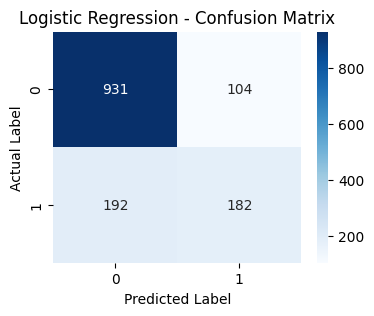

In [21]:
cm_log = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


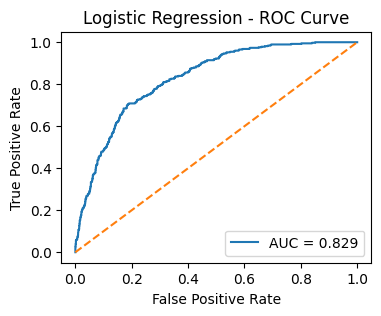

In [27]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression - ROC Curve")
plt.legend()
plt.show()

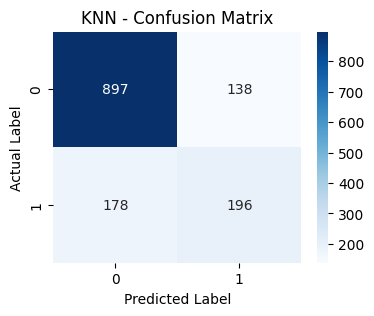

In [22]:
cm_knn = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


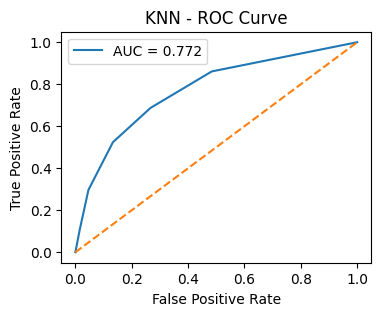

In [28]:
knn_prob = knn_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_prob)
auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(4, 3))
plt.plot(fpr_knn, tpr_knn, label=f"AUC = {auc_knn:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN - ROC Curve")
plt.legend()
plt.show()

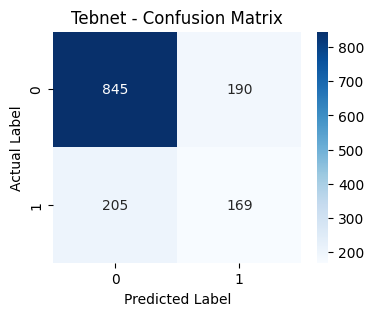

In [23]:
cm_tree = confusion_matrix(y_test, tree_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Blues")
plt.title("Tebnet - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


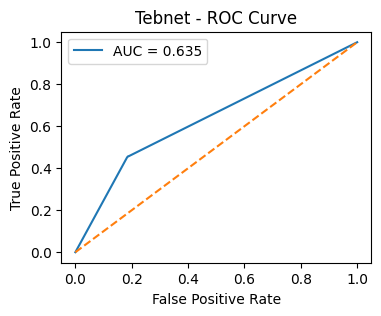

In [29]:
tree_prob = tree_model.predict_proba(X_test)[:, 1]
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_prob)
auc_tree = auc(fpr_tree, tpr_tree)

plt.figure(figsize=(4, 3))
plt.plot(fpr_tree, tpr_tree, label=f"AUC = {auc_tree:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Tebnet - ROC Curve")
plt.legend()
plt.show()

In [32]:
new_customer = np.array([[1, 0, 1, 0, 0.5, 1, 1, 0.8, 0.2, 1, 0]])
prediction = model.predict(new_customer)

if prediction[0] == 1:
    print("\nCHURN.")
else:
    print("\nSTAY.")


STAY.
